<strong>Importing of required libraries and packages</strong>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<strong>Reading CSV file</strong>

In [113]:
df = pd.read_csv("ford.csv")

df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


<strong>Check for missing values and data type</strong>

In [114]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


None

<strong>Function to get number of observation for unique value in a column of Dataframe </strong>

In [115]:
def unique_val_count(data, column):
    df_count = data[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

<strong>Getting number of observation for unique value in a column of Dataframe </strong>

In [119]:
model_count = unique_val_count(df,'model')
year_count = unique_val_count(df,'year')
price_count = unique_val_count(df,'price')
transmission_count = unique_val_count(df,'transmission')
mileage_count = unique_val_count(df,'mileage')
fuelType_count = unique_val_count(df,'fuelType')
mpg_count = unique_val_count(df,'mpg')
engineSize_count = unique_val_count(df,'engineSize')

,engineSize,No_of_cars,% of cars
0,1.0,7764,43.22
1,1.5,3418,19.03
2,2.0,3311,18.43
3,1.2,1626,9.05
4,1.6,923,5.14
5,1.1,559,3.11
6,1.4,111,0.62
7,2.3,80,0.45
8,0.0,51,0.28
9,5.0,45,0.25


<strong>Function to show the number of observations for each unique value in a column using a barplot

In [117]:
def barplot(data, column_x, color, rotation, yticks):

    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    plt.title("Number of cars present for each " + column_x)
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    plt.xticks(rotation=rotation)
    plt.yticks(yticks)

<strong> Creating subplots

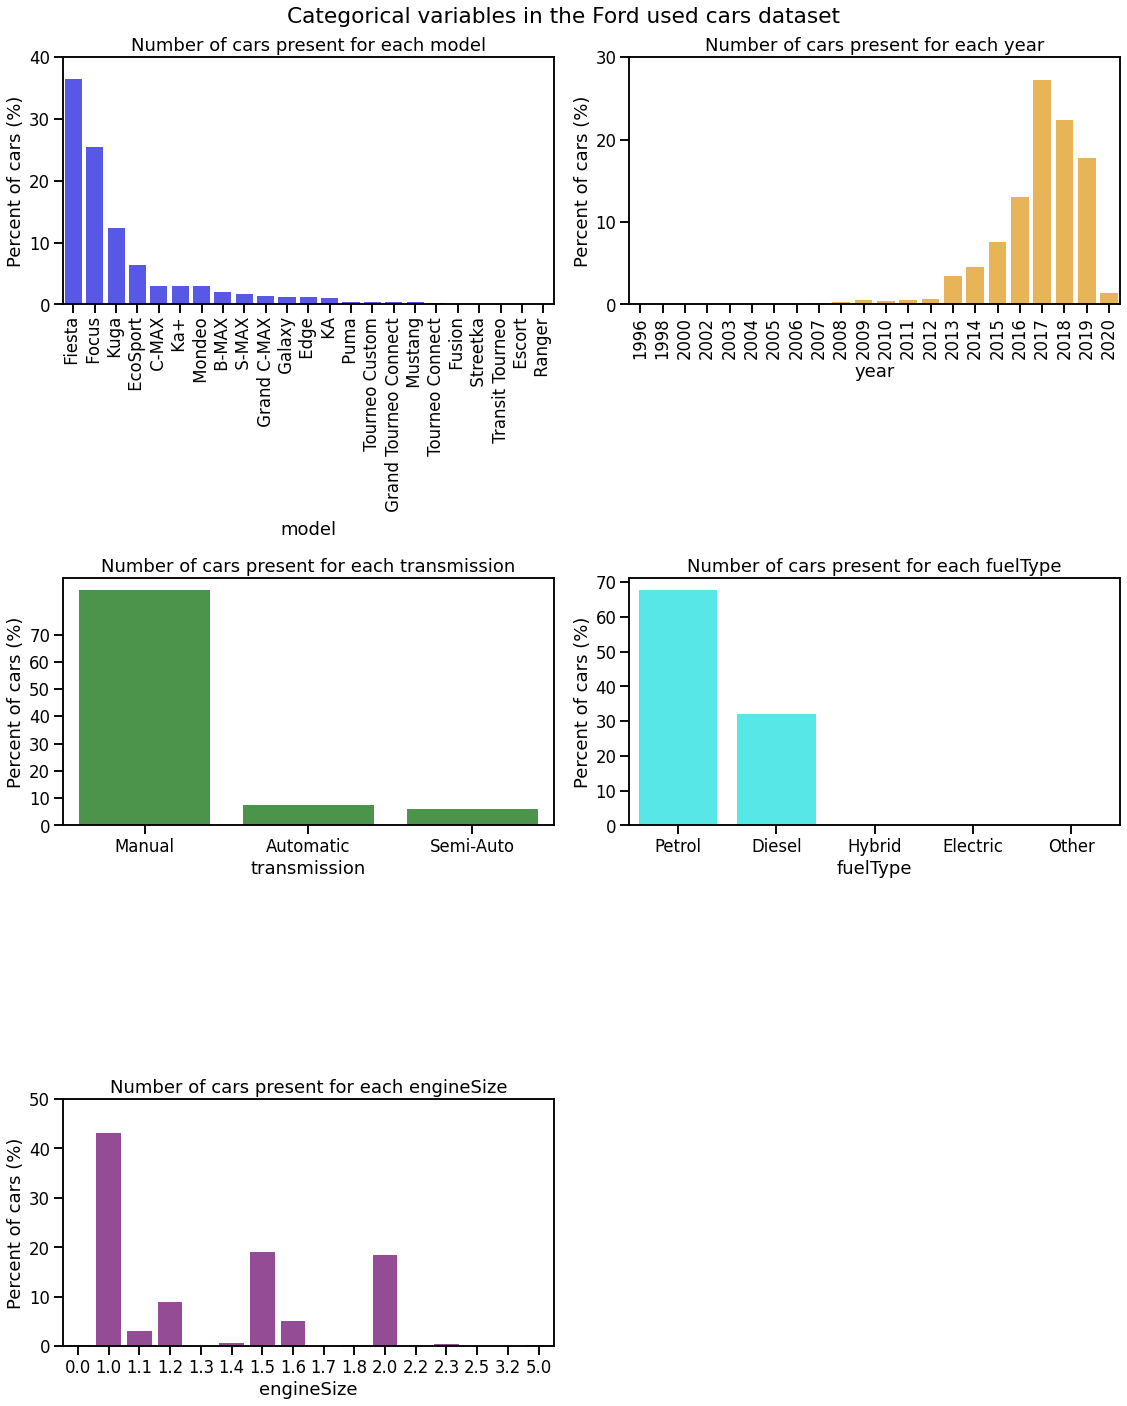

In [132]:
sns.set_context('talk')

plt.figure(figsize=(16,20))

plt.subplot(3,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(0,41,10))

plt.subplot(3,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,31,10))

plt.subplot(3,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

plt.subplot(3,2,4)
barplot(fuelType_count, 'fuelType', 'cyan', 0, np.arange(0,71,10))

plt.subplot(3,2,5)
barplot(engineSize_count, 'engineSize', 'purple', 0, np.arange(0,51,10))


plt.suptitle("Categorical variables in the Ford used cars dataset")

plt.tight_layout()

plt.show()